In [301]:
## reading the data from whatsapp report
import pandas as pd
import numpy as np
import regex as re
import datetime
import calendar
import matplotlib.pyplot as plt



date =[]
time =[]
name=[]
subject = []


with open("WhatsApp Chat with Former 7 shuttlers.txt", encoding="utf-8") as fp:
    while True:
        line = fp.readline()
        
        if not line:
            print('EOF')
            break
        data = line
        pattern = "(\d{2}/\d{2}/\d{4})"
        temp = re.findall(pattern, data)
        if len(temp)!=0 :
            date.append("".join(temp))

            pattern = "(\d{2}:\d{2})"
            time.append("".join(re.findall(pattern, data)))
            
            pattern = ".*- (\.*\s*.*): "
            name.append("".join(re.findall(pattern, data)))

            pattern = ": (.*)"
            subject.append("".join(re.findall(pattern, data)))

        
        else:
            subject[-1] = subject[-1]+"".join(data)

        


df = pd.DataFrame(list(zip(date,time,name,subject)),columns=['date','time','name','subject'] )

df.to_csv("output.csv")


for pos,data in enumerate(df['date']):
    df.loc[pos,['dayofweek']] = calendar.day_name[datetime.datetime.strptime(data, "%d/%m/%Y").weekday()]


for pos,data in enumerate(df['subject']):
    for c in data:
        df.loc[pos,['memes']] = np.where(ord(c) < 128,0,1)
    df.loc[pos, ['youtube_share']] = np.where('youtube' in data, 1, 0)
    df.loc[pos, ['contact_file_attachment']] = np.where('attached)' in data, 1, 0)
    df.loc[pos, ['images']] = np.where('Media omitted' in data, 1, 0)
   
    


df1 = df[df['name']!='']









EOF


Index(['Saturday', 'Friday', 'Sunday', 'Thursday', 'Wednesday', 'Monday',
       'Tuesday'],
      dtype='object')
[2446 2099 1822  617  476  375  245]


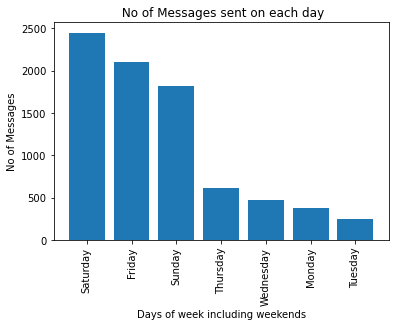

In [302]:

print(df1['dayofweek'].value_counts().keys())
print(df1['dayofweek'].value_counts().values)
plt.bar(df1['dayofweek'].value_counts().keys(),df1['dayofweek'].value_counts().values)
plt.xticks(rotation='vertical')
plt.xlabel("Days of week including weekends")
plt.ylabel("No of Messages")
plt.title(" No of Messages sent on each day")
plt.show()


In [303]:
df2 = df1.copy()

post_array = []

for pos,data in enumerate(df1['name']):
    if ":" in data:
        post_array.append(data)
        
        
        
print(post_array)


    

['Vinayak SIR: Madas', 'Mariakka: Venue ', 'Madhan🤡: There is no excuse to being late. Ever. Being late is telling the other person', 'Vinayak SIR: Madan', 'Mariakka: Team ', 'Shuttle Aravindh: Madas na ', 'Vinayak SIR: Madasamy', 'Vinayak SIR: Madas', 'Mariakka: Court booked ', 'Vinayak SIR: Thiru', 'Madhan🤡: Courtesy ', 'Shuttle Aravindh: Pudupetai dialogue']


In [304]:
for i in post_array:
    df1 = df1[df1['name']!=i]

In [305]:
df3 = df1.copy()

In [306]:
print(df3['name'].value_counts())

Shuttle Aravindh    2346
Vinayak SIR         1849
Mariakka            1310
Madhan🤡              955
Thiru Shuttle        787
+91 98657 07874      332
+91 96005 73784      203
+91 99442 08636      181
Marimut Pactron      105
Name: name, dtype: int64


Index(['Shuttle Aravindh', 'Vinayak SIR', 'Mariakka', 'Madhan🤡',
       'Thiru Shuttle', '+91 98657 07874', '+91 96005 73784',
       '+91 99442 08636', 'Marimut Pactron'],
      dtype='object')
[2346 1849 1310  955  787  332  203  181  105]


C:\Users\Electrobot\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129313 (\N{CLOWN FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


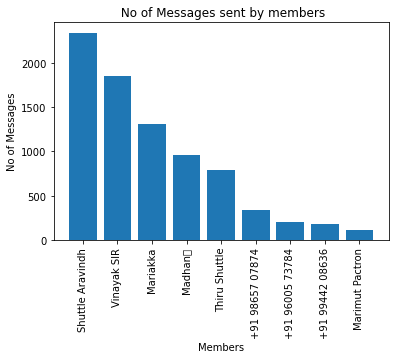

In [307]:
print(df1['name'].value_counts().keys())
print(df1['name'].value_counts().values)
plt.bar(df1['name'].value_counts().keys(),df1['name'].value_counts().values)
plt.xticks(rotation='vertical')
plt.xlabel("Members")
plt.ylabel("No of Messages")
plt.title(" No of Messages sent by members")
plt.show()


In [308]:
crosstb = pd.crosstab(df1.name, df1.images)
crosstb

images,0.0,1.0
name,,
+91 96005 73784,184,19
+91 98657 07874,256,76
+91 99442 08636,168,13
Madhan🤡,877,78
Mariakka,1046,264
Marimut Pactron,102,3
Shuttle Aravindh,1712,634
Thiru Shuttle,618,169
Vinayak SIR,1796,53


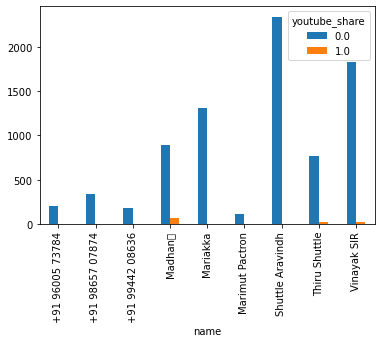

In [316]:
crosstb.plot.bar()
plt.show()

In [311]:
pd.crosstab(df1.name, df1.contact_file_attachment)

contact_file_attachment,0.0,1.0
name,,
+91 96005 73784,203,0
+91 98657 07874,332,0
+91 99442 08636,181,0
Madhan🤡,955,0
Mariakka,1309,1
Marimut Pactron,105,0
Shuttle Aravindh,2346,0
Thiru Shuttle,786,1
Vinayak SIR,1845,4


In [318]:
crosstb = pd.crosstab(df1.name, df1.contact_file_attachment)

C:\Users\Electrobot\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129313 (\N{CLOWN FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


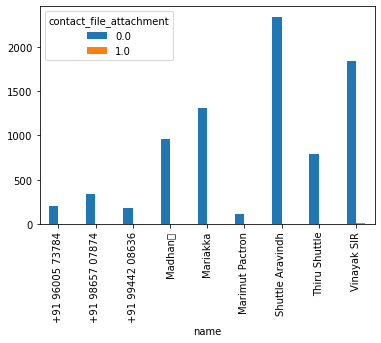

In [319]:

crosstb.plot.bar()
plt.show()

C:\Users\Electrobot\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129313 (\N{CLOWN FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


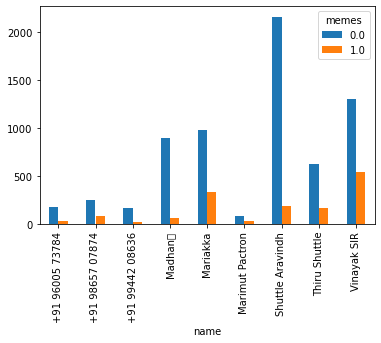

In [320]:
crosstb = pd.crosstab(df1.name, df1.memes)
crosstb.plot.bar()
plt.show()

C:\Users\Electrobot\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129313 (\N{CLOWN FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


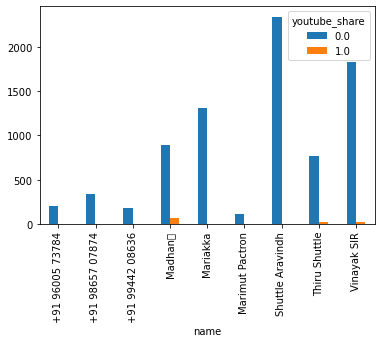

In [321]:
crosstb = pd.crosstab(df1.name, df1.youtube_share)
crosstb.plot.bar()
plt.show()